In [104]:
import csv
import numpy as np
import pandas as pd
import scipy
import random
from plotnine import *

In [105]:
with open('kmer_depth.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    kmers = []
    occurences = []
    for x, y in reader:
        kmers.append(int(x))
        occurences.append(int(y))
        


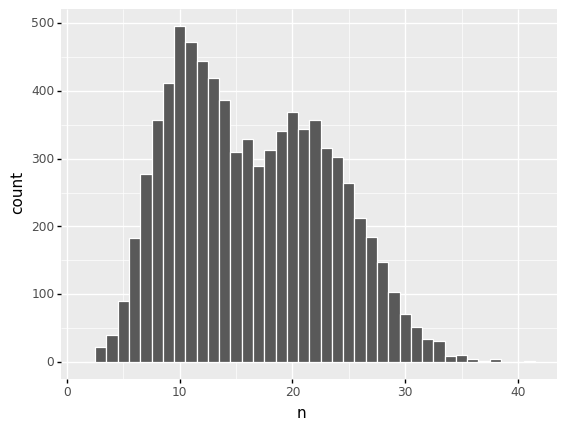

<ggplot: (8792016733344)>

In [133]:
dataframe = pd.DataFrame(data={'kmers':kmers, 'n':occurences})
ggplot(dataframe)+geom_histogram(aes(x='n'),color="white", binwidth=1)

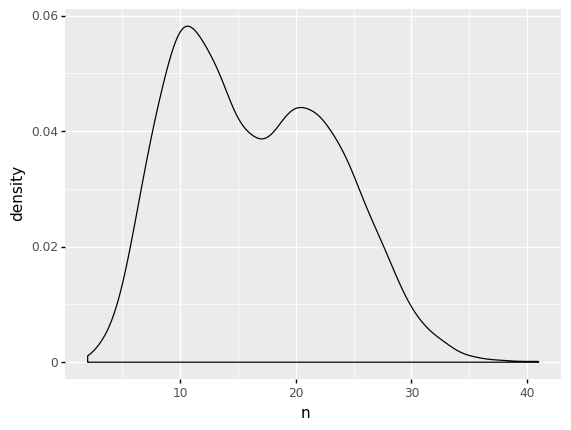

<ggplot: (8792016796420)>

In [141]:
ggplot(dataframe)+geom_density(aes(x = 'n'), color = 'black')

In [108]:
len(dataframe)

8000

In [109]:
lambdas =  random.choices([i for i in range(min(occurences), max(occurences))], k=2)
# start with two random lambdas within the range of the data

In [142]:
# uniform priors
log_priors = [np.log(1/2)]*2


In [143]:
def expectation(data, lambdas):
    all_posteriors = []
    for i in range(len(data)):
        posteriors = calc_posteriors(data['n'][i], lambdas, log_priors)
        all_posteriors.append(posteriors)
    return all_posteriors

In [144]:
def calc_posteriors(n, lambdas,log_priors):
    log_likelihoods = scipy.stats.poisson.logpmf(n, lambdas)
    log_posteriors = []
    log_marginal_likelihoods = log_likelihoods + log_priors
    for (i, log_likelihood) in enumerate(log_likelihoods):
        log_posteriors.append(log_likelihood + log_priors[i] - 
            scipy.special.logsumexp(log_marginal_likelihoods))
    return np.exp(log_posteriors)

In [145]:
def maximization(all_posteriors, data, lambdas):
    numerator = [0]*2
    denominator = [0]* 2
    for i in range(len(all_posteriors)):
        for (j, posterior) in enumerate(all_posteriors[i]):
            numerator[j] += posterior * data['n'][i]
            denominator[j] += posterior
            
    l_primes = [numerator[i]/denominator[i] for i in range(2)]
    return l_primes

In [146]:
for i in range(5):
    all_posteriors = expectation(dataframe, p_lambdas)
    lambdas = maximization(all_posteriors, dataframe, p_lambdas)
lambdas

[10.926869254928222, 21.894303628161]

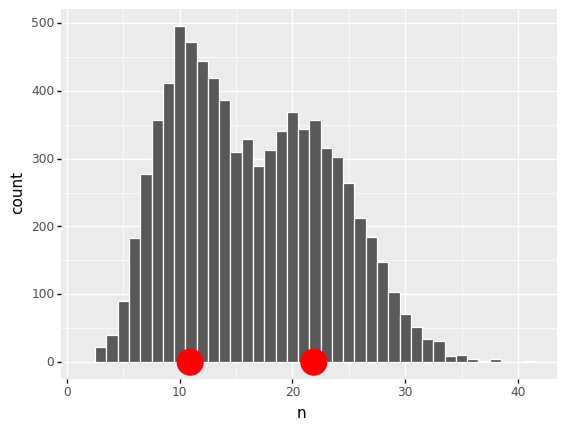

<ggplot: (8792048710675)>

In [147]:
l_data = pd.DataFrame(data={'l':lambdas,'y':[0]*2})
ggplot(dataframe)+geom_histogram(aes(x='n'),color="white", binwidth=1) +   geom_point(aes(x='l',y='y'), data = l_data ,color="red", size = 10)